# Authentication Demonstration

In [3]:
%cd cssrlib-data/samples

c:\work\gps\cssrlib\tutorials\cssrlib-data\samples


## Example 1: Galileo OSNMA Demonstration 

In [4]:
import os
import numpy as np
import cssrlib.osnma as om
from sys import exit as sys_exit
from binascii import unhexlify, hexlify
import matplotlib.pyplot as plt

In [6]:
tofst = -2  # time offset to synchronize tow
mt_file = 'OSNMA_MerkleTree_20240115100000_newPKID_1.xml'

if not os.path.exists('../data/pubkey/osnma/'+mt_file):
    print('please install OSNMA_MerkleTree*.xml from EUSPA.')
    sys_exit(0)

nma = om.osnma(mt_file)

nma.flg_slowmac = False

In [8]:
year = 2025
doy = 233
session = 'h'

file_galinav = f'../data/doy{year}-{doy:03d}/{doy:03d}{session}_galinav.txt'

dtype_ = [('tow', 'i8'), ('wn', 'i8'), ('prn', 'i8'),
          ('mt', 'i8'), ('k', 'i8'), ('nma', 'S10'),
          ('wt', 'i8'), ('nav', 'S32')]

dtype_ = [('wn', 'int'), ('tow', 'float'), ('prn', 'int'),
          ('type', 'int'), ('len', 'int'), ('nav', 'S512')]

v = np.genfromtxt(file_galinav, dtype=dtype_)

In [9]:
i = 0

v = v[v['type'] == 0]  # E1 only
tow = np.unique(v['tow'])
ntow = len(tow)
nsat = np.zeros((ntow, 3), dtype=int)
vstatus = np.zeros(ntow, dtype=int)

# nep = 90
# nep = 180
nep = 300
nep = 1799

for i, t in enumerate(tow[0:nep]):
    vi = v[v['tow'] == t]
    for vn in vi:
        tow_ = int(vn['tow'])+tofst
        prn = int(vn['prn'])
        nma.prn_a = prn
        msg = unhexlify(vn['nav'])  # I/NAV (120bit+120bit)
        nav, nma_b = nma.load_gal_inav(msg)
        nma.save_gal_inav(nav, prn, tow_)
        if nma_b[0] != 0:  # for connected satellite
            nma.decode(nma_b, int(vn['wn']), tow_, prn)
            nsat[i, 1] += 1

    nsat[i, 0] = len(vi)
    nsat[i, 2] = nma.nsat  # authenticated sat
    vstatus[i] = nma.status

decode_hk succeeded 2380/370919 prn=21 gst_tow=370890 did=5
root-key verified 2380/370919 prn=21 gst_tow=370890
Key chain verified     2380/370919 prn=21 gst_tow=370890
MAC Look-up Table verified on 2380/370919 prn=21 gst_tow=370860
MACSEQ Verified on 2380/370919 prn=21
# 1 prn_d=21 adkd= 0 iodnav=108 tag verified
# 2 prn_d=29 adkd= 0 iodnav=106 tag verified
# 3 prn_d=21 adkd= 4 tag verified
# 4 prn_d=23 adkd= 0 iodnav=103 tag verified
5 prn_d=21 adkd=12 slow-MAC is skipped
# 6 prn_d=27 adkd= 0 iodnav=104 tag verified
MAC Look-up Table verified on 2380/370919 prn=10 gst_tow=370860
MACSEQ Verified on 2380/370919 prn=10
# 1 prn_d=10 adkd= 0 iodnav=108 tag verified
# 2 prn_d=12 adkd= 0 iodnav=108 tag verified
# 3 prn_d=10 adkd= 4 tag verified
# 4 prn_d=11 adkd= 0 iodnav=106 tag verified
5 prn_d=10 adkd=12 slow-MAC is skipped
6 prn_d=9 adkd=0 navmsg is not available.
MAC Look-up Table verified on 2380/370919 prn=33 gst_tow=370860
MACSEQ Verified on 2380/370919 prn=33
# 1 prn_d=33 adkd= 0 i

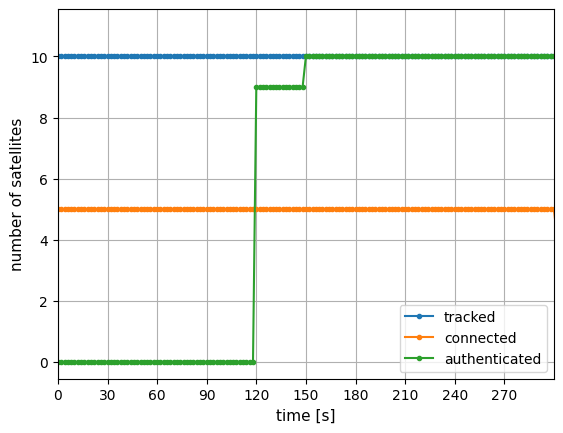

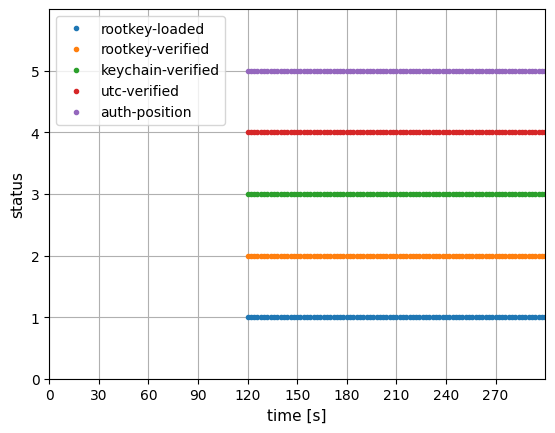

In [10]:
if True:
    fsz = 11
    tmax = 300

    fig, ax = plt.subplots()
    plt.plot(tow-tow[0], nsat[:, 0], '.-', label='tracked')
    plt.plot(tow-tow[0], nsat[:, 1], '.-', label='connected')
    plt.plot(tow-tow[0], nsat[:, 2], '.-', label='authenticated')
    plt.grid()
    plt.legend()
    plt.xlim([0, tmax])
    ax.set_xticks(np.arange(0, 300, 30))
    plt.ylabel('number of satellites', fontsize=fsz)
    plt.xlabel('time [s]', fontsize=fsz)
    plt.savefig('osnma-{0:d}-nsat-{1:d}.png'.format(doy, tmax))
    plt.show()

    y = np.ones(ntow)
    lbl_t = ['rootkey-loaded', 'rootkey-verified', 'keychain-verified',
             'utc-verified', 'auth-position']
    fig, ax = plt.subplots()
    for k in range(5):
        idx = np.where(vstatus & (1 << k))
        plt.plot(tow[idx]-tow[0], y[idx]*(k+1), '.', label=lbl_t[k])
    plt.grid()
    ax.set_yticks(np.arange(0, 6))
    ax.set_xticks(np.arange(0, 300, 30))
    plt.legend()
    plt.ylim([0, 6])
    plt.xlim([0, tmax])
    plt.ylabel('status', fontsize=fsz)
    plt.xlabel('time [s]', fontsize=fsz)
    plt.savefig('osnma-{0:d}-status.png'.format(doy))
    plt.show()


## Example 2: QZSS QZNMA Demonstration


In [ ]:
import os
from sys import exit as sys_exit
from binascii import unhexlify
import numpy as np
from cssrlib.gnss import prn2sat, uGNSS
from cssrlib.qznma import qznma, uNavId
import matplotlib.pyplot as plt

In [ ]:
if not os.path.exists('../data/pubkey/qznma/002.der'):
    print('please install public key file from QSS.')
    sys_exit(0)


In [ ]:
dtype = [('wn', 'int'), ('tow', 'float'), ('prn', 'int'),
         ('type', 'int'), ('len', 'int'), ('nav', 'S512')]
msg_nav_t = {uNavId.GPS_LNAV: 'LNAV', uNavId.GPS_CNAV: 'CNAV',
             uNavId.GPS_CNAV2: 'CNAV2',
             uNavId.GAL_FNAV: 'F/NAV', uNavId.GAL_INAV: 'I/NAV'}

# prn_ref = -1
prn_ref = 199
navmode = uNavId.GPS_LNAV  # 1:LNAV, 2:CNAV, 3:CNAV2
year = 2025
doy = 233
session = 'h'
flg_gnss = True

qz = qznma()
qz.monlevel = 1

bdir = f'../data/doy{year}-{doy:03d}/'

if navmode == uNavId.GPS_LNAV:
    navfile = bdir+f'{doy:03d}{session}_qzslnav.txt'
elif navmode == uNavId.GPS_CNAV:
    navfile = bdir+f'{doy:03d}{session}_qzscnav.txt'
elif navmode == uNavId.GPS_CNAV2:
    navfile = bdir+f'{doy:03d}{session}_qzscnav2.txt'

v = np.genfromtxt(navfile, dtype=dtype)

In [ ]:
if navmode == uNavId.GPS_CNAV:
    v = v[v['type'] == 26]  # L5 CNAV only

if flg_gnss:
    navfile_n = bdir+f'{doy:03d}{session}_qzsl6.txt'
    navfile_gpslnav = bdir+f'{doy:03d}{session}_gpslnav.txt'
    navfile_gpscnav = bdir+f'{doy:03d}{session}_gpscnav.txt'
    # navfile_gpscnav2 = bdir+'{doy:03d}{session}_gpscnav2.txt'
    navfile_galinav = bdir+f'{doy:03d}{session}_galinav.txt'
    navfile_galfnav = bdir+f'{doy:03d}{session}_galfnav.txt'

    # load navigation message
    qz.load_navmsg_lnav(navfile_gpslnav)
    qz.load_navmsg_cnav(navfile_gpscnav)
    qz.load_navmsg_inav(navfile_galinav)
    qz.load_navmsg_fnav(navfile_galfnav)

    vn = np.genfromtxt(navfile_n, dtype=dtype)

In [ ]:
# tow_ = np.unique(v['tow'])
tow_ = np.arange(v['tow'][0], v['tow'][-1])
nep = len(tow_)
# nep = 1200

nsat = np.zeros((nep, 4), dtype=int)
vstatus = np.zeros(nep, dtype=int)

for k in range(nep):
    vi_ = v[v['tow'] == tow_[k]]

    for vi in vi_:
        msg = unhexlify(vi['nav'])
        sat = prn2sat(uGNSS.QZS, vi['prn'])
        qz.decode(tow_[k], msg, None, sat, navmode)

    if flg_gnss:
        vin_ = vn[(vn['tow'] == tow_[k]) & (vn['type'] == 1)]
        if prn_ref > 0:
            vin_ = vin_[vin_['prn'] == prn_ref]

        for vin in vin_:
            msg_n = unhexlify(vin['nav'])
            qz.decode(tow_[k], None, msg_n, sat, navmode)

    nsat[k, 0] = qz.count_tracked_sat(tow_[k])
    nsat[k, 1:] = np.array([qz.nsat[d] for d in qz.nsat])

In [ ]:
if True:
    fsz = 11

    tmax = 300
    t = tow_-tow_[0]

    fig, ax = plt.subplots()
    # plt.plot(tow_-tow_[0], nsat[:, 0], label='tracked')
    plt.plot(t, nsat[:, 1], '.-', label='GPS ' +
             msg_nav_t[qz.navmode[uGNSS.GPS]])
    plt.plot(t, nsat[:, 2], '.-', label='GAL ' +
             msg_nav_t[qz.navmode[uGNSS.GAL]])
    plt.plot(t, nsat[:, 3], '.-', label='QZS '+msg_nav_t[navmode])
    plt.grid()
    plt.legend()
    plt.xlim([0, tmax])
    # ax.set_xticks(np.arange(0, 300, 30))
    plt.ylabel('number of satellites', fontsize=fsz)
    plt.xlabel('time [s]', fontsize=fsz)
    plt.savefig('qznma-{0:d}-nsat-{1:d}.png'.format(doy, tmax))
    plt.show()

## Reference

[^1] Galileo Open Service Navigation Message Authentication (OSNMA)
    Signal-in-Space Interface Control Document (SIS ICD), October, 2023.

[^2] Galileo Open Service Navigation Message Authentication (OSNMA)
    Receiver Guidelines Issue 1.3, January, 2024.

[^3] Quasi-Zenith Satellite System Interface Specification
    Signal Authentication Service (IS-QZSS-SAS-001),
    March, 2024